# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat

--2022-02-06 23:03:06--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.10’

test.dat.10         100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-02-06 23:03:06 (196 MB/s) - ‘test.dat.10’ saved [2844/2844]

--2022-02-06 23:03:06--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.10’

train.dat.10        100%[===================>]  10.98K  --.-KB/s    in 0.001s  

2022-02-06 23:03:06 (11.1 MB/s) - ‘train.dat.10’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label

def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data



def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(x*y for x, y in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    sigmoid = 1/(1 + math.exp(-x))
    return sigmoid

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights

def output(weight, instance):
    #TODO: return the output of the model
    for i in range(0, len(weight)):
        out = sigmoid(dot_product(weight, instance))  
    return out

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0

def predict(weights, instance):    
    #TODO: return the prediction of the model
    prediction = output(weights, instance)
    final = 0
    if prediction >= 0.5:
        final = 1; 
    return final


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.

def train_perceptron(instances, lr, epochs):
    #TODO: name this step
    #Initiating weights
    weights = [0] * (len(instances[0])-1)
    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # Finding dot value of the element and it's weight
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Updating Weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]
    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
In the "train_perceptron" function we are training the model, not using the model to predict something. A model cannot be used to predict unless it's completely trained.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [5]:
# For plotting
accuracy_arr = []
epochs_arr = []
percent_arr = []
lr_arr = []

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size =  round(len(instances_tr)*tr_size/100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            accuracy_arr.append(accuracy)
            lr_arr.append(lr)
            epochs_arr.append(epochs)
            percent_arr.append(size)
            print(f"#tr: {len(pre_instances):0}, epochs: {epochs}, learning rate: {lr:.3f}; "
                        f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 20, learning rate: 0.

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A.
Typically, yes, more the data, better the accuracy. But, not necessarily, more data can lead to a better model only if the data is completely out of noise. Noise usally referes to human bias, outliers and incomplete data.

B.
Although the second run uses more data, it has a slower learning rate, and on top of that, possibly not enough number of epochs for the model to get completely trained.

C.
Having more hyperparameters, might or might not lead to higher accuracy, because finding a perfect combination is usally an expermenting thing , which are endless. We migth find a preferable combination with more hyperparameters, or could possibly be better of with the existing hyperparameters.

D.
It depends. 10000 epochs on something as little as 10 data points is pointless, and 10 epochs on 10000 is not ideal. Sometimes, more epochs can even overfit the data, which won't work accurately on unseen data. Excess epochs are waste of resources too.

In [7]:
import numpy as np
accuracy_arr = np.array(accuracy_arr)
epochs_arr = np.array(epochs_arr)
percent_arr = np.array(percent_arr)
lr_arr = np.array(lr_arr)

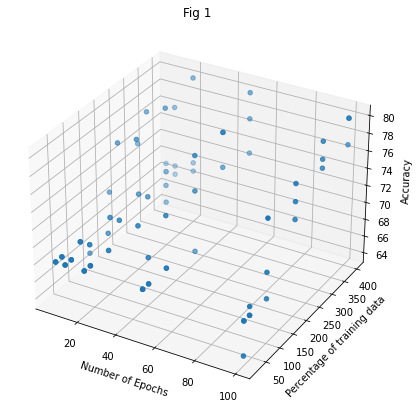

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(epochs_arr, percent_arr, accuracy_arr)
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Percentage of training data")
ax.set_zlabel("Accuracy")
plt.title("Fig 1")
plt.show()

From the fig 1, we can see that the accuracy is positively correlated to percentage of training data, rather than number of epochs, at least for this dataset. This is becasue the data set is small and probably free of any kind of noise, but it could change with the kind of data and, the noise involved in it.

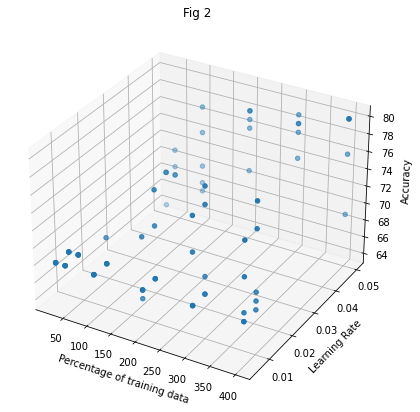

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(percent_arr, lr_arr, accuracy_arr)
ax.set_xlabel("Percentage of training data")
ax.set_ylabel("Learning Rate")
ax.set_zlabel("Accuracy")
plt.title("Fig 2")
plt.show()

In fig 2, the accuracy is highest where the percentage of data is more and learning rate is faster, this clearly shows that the model had enough data, and sufficient learning rate to learn about the data. But, this is not always true, becuase having a faster learning rate might reach the optimum faster, but when there's enough data and number of epochs, a bit slower learning rate will do it better, by reaching the optimum point much precisely.

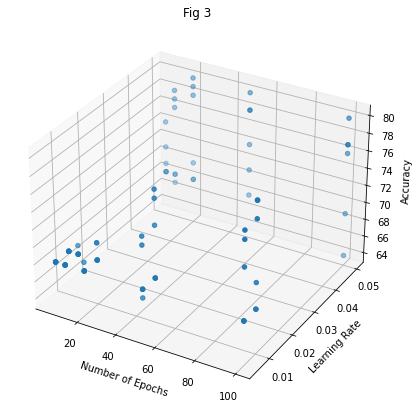

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

ax.scatter(epochs_arr, lr_arr, accuracy_arr)
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Learning Rate")
ax.set_zlabel("Accuracy")
plt.title("Fig 3")
plt.show()

Fig 3 suggests that more number of epochs are necessary when having slower learning rate, which is evident where the learning rate is slow, and the number of epochs are less. This is because the model didn't have enough epochs, considering the learning rate, to reach the optimum. It's like giving the same amount of time to a hare and a tortoise to reach a destination, cause, obviously the rabbit will reach the destination much faster. The tortoise will reach the destination, as well, we just have it give enough time.